In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("owid-covid-data.csv")

In [ ]:
df.head(10)

In [3]:
# Q1. Total number of cases, deaths, recoveries, and vaccinations globally.

totalcases = df["total_cases"].sum()
print ("Total number of cases:", totalcases)

totaldeaths = df["total_deaths"].sum()
print ("Total number of deaths:", totaldeaths)

totalvax = df["total_vaccinations"].sum()
print ("Total number of vaccinations:", totalvax)

Total number of cases: 2085794642450.0
Total number of deaths: 24989420187.0
Total number of vaccinations: 35367182493993.0


In [4]:
# Q2. Countries with the highest and lowest total cases and deaths.

highestcases = df.sort_values(by="total_cases", ascending = False)
print ("Location with the most cases:\n")
print (highestcases.head(1))

leastcases = df.sort_values(by="total_cases", ascending = True)
print ("Location with the least cases:\n")
print (leastcases.head(1))


mostdeaths = df.sort_values(by="total_deaths", ascending = False)
print ("Location with the most deaths:\n")
print (mostdeaths.head(1))

leastdeaths = df.sort_values(by="total_deaths", ascending = True)
print ("Location with the least deaths:\n")
print (leastdeaths.head(1))

Location with the most cases:

        iso_code continent location        date  total_cases  new_cases  \
345923  OWID_WRL       NaN    World  2023-10-17  771407061.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
345923            4032.429     6972139.0         0.0               21.571   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
345923  ...        34.635                   60.13                       2.705   

        life_expectancy  human_development_index    population  \
345923            72.58                    0.737  7.975105e+09   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
345923                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
345923               NaN                                      NaN  

[1 rows x 67 columns]
Location with the least cases:

   iso_code continent

In [5]:
# Q3. Countries with the highest vaccination coverage (percentage of population vaccinated).

# Assume vaccination data is in 'total_vaccinations' and population in 'population'
df['vaccination_coverage'] = (df['total_vaccinations'] / df['population']) * 100
top_vaccination_countries = df[['location', 'vaccination_coverage']].sort_values(by='vaccination_coverage', ascending=False).head(1)
print(top_vaccination_countries)


      location  vaccination_coverage
73386     Cuba            406.896346


In [6]:
#Q4. Global case fatality rate (deaths/cases).
global_stats = df.iloc[-1][['total_cases', 'total_deaths',  'total_vaccinations']]

global_cfr = (global_stats['total_deaths'] / global_stats['total_cases']) * 100
print("Global Case Fatality Rate :", global_cfr)


Global Case Fatality Rate : 2.1511767892614215


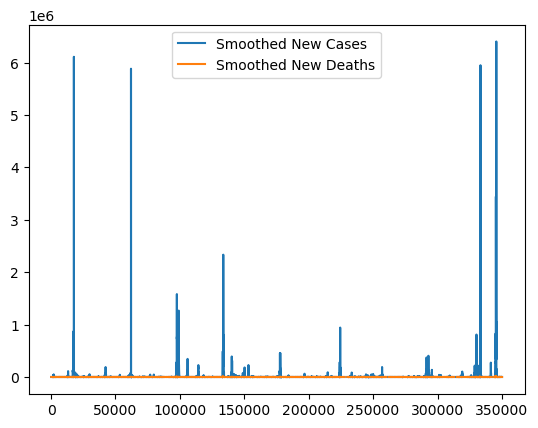

In [7]:
# Q5. New cases and deaths trends (daily and smoothed).

df['new_cases'] = df['total_cases'].diff()
df['new_deaths'] = df['total_deaths'].diff()

# Smoothed data (7-day moving average)
df['smoothed_cases'] = df['new_cases'].rolling(window=7).mean()
df['smoothed_deaths'] = df['new_deaths'].rolling(window=7).mean()

# Plotting
import matplotlib.pyplot as plt
plt.plot(df['smoothed_cases'], label='Smoothed New Cases')
plt.plot(df['smoothed_deaths'], label='Smoothed New Deaths')
plt.legend()
plt.show()


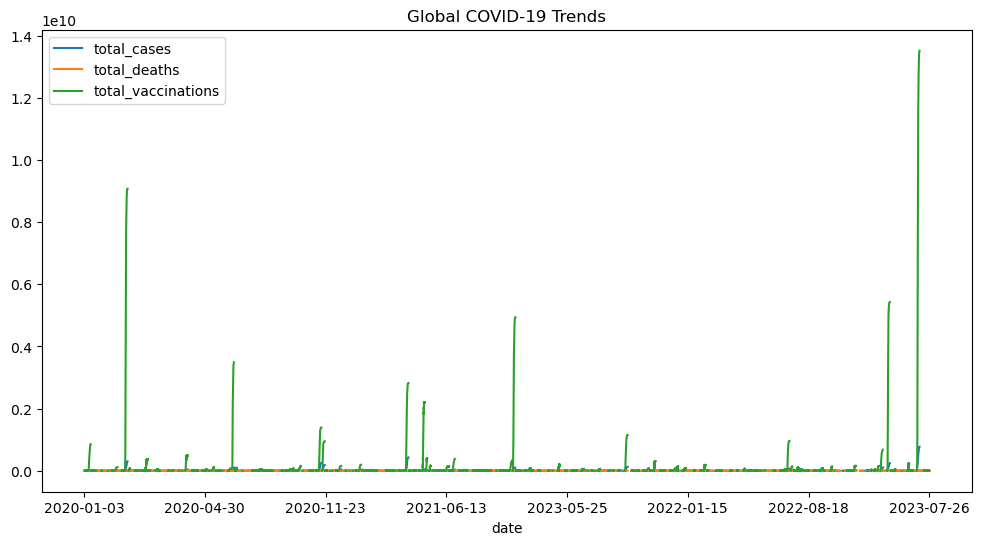

In [8]:
# Q6. Trends of cases, deaths, and vaccinations over time globally and by country

df[['date', 'total_cases', 'total_deaths', 'total_vaccinations']].plot(x='date', figsize=(12, 6))
plt.title('Global COVID-19 Trends')
plt.show()


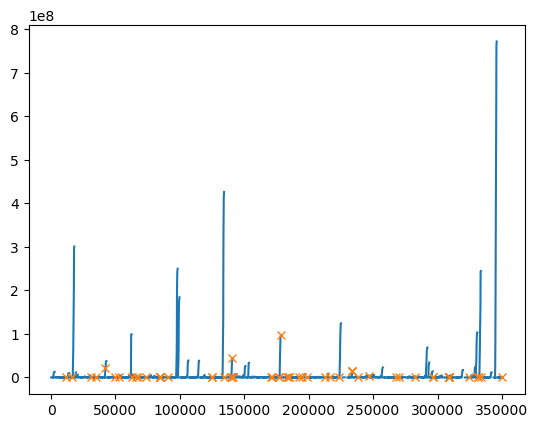

In [9]:
# Q7. Identify peaks in cases, deaths, and vaccinations over the observation period

from scipy.signal import find_peaks
peaks, _ = find_peaks(df['total_cases'])
plt.plot(df['total_cases'])
plt.plot(peaks, df['total_cases'].iloc[peaks], "x")
plt.show()


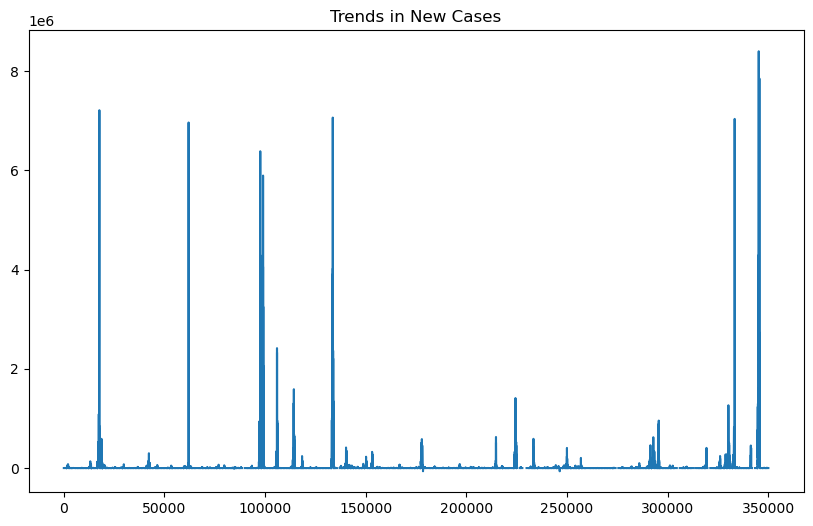

In [10]:
# Q8. Reproduction rate trends to study the progression of the pandemic.

# Example of plotting trends in new cases
df['new_cases'].plot(figsize=(10, 6), label="New Cases")
plt.title('Trends in New Cases')
plt.show()


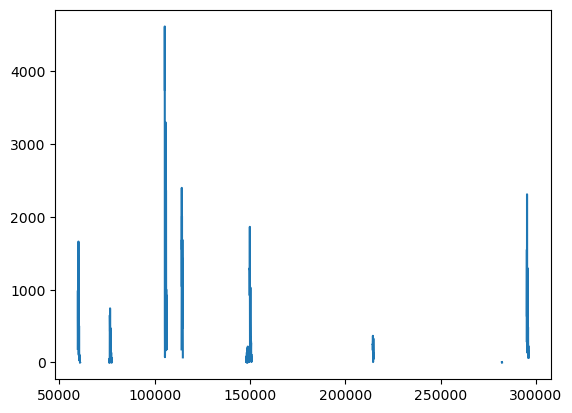

In [11]:
# Q9. Time-series analysis of ICU and hospital admissions (weekly trends).

df['icu_patients'] = df['icu_patients'].diff()
df['smoothed_icu'] = df['weekly_icu_admissions'].rolling(window=7).mean()
plt.plot(df['smoothed_icu'], label="Smoothed ICU Admissions")
plt.show()


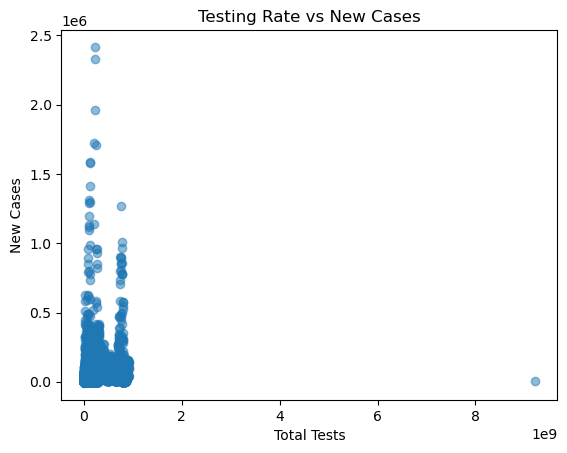

In [12]:
# Q10.	Relationship between testing rates and new cases over time

plt.scatter(df['total_tests'], df['new_cases'], alpha=0.5)
plt.title('Testing Rate vs New Cases')
plt.xlabel('Total Tests')
plt.ylabel('New Cases')
plt.show()


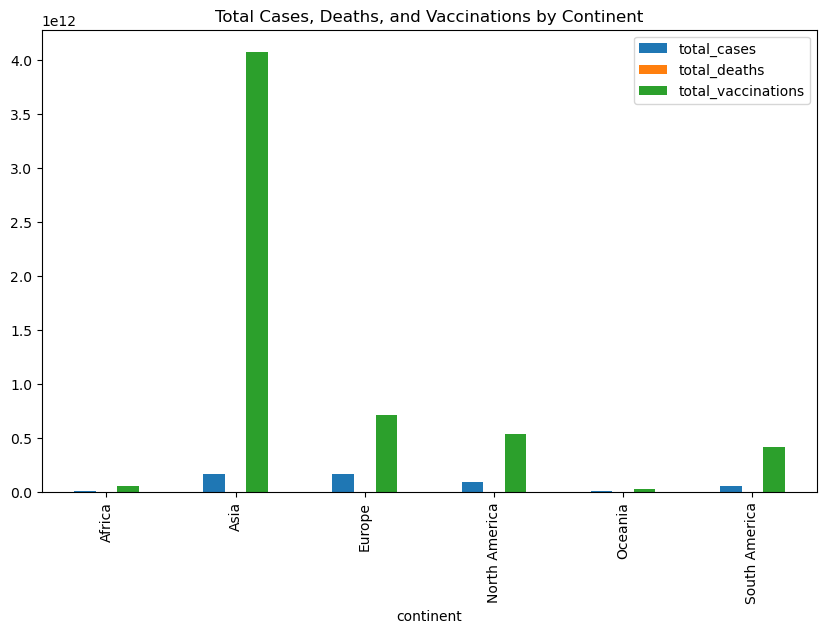

In [13]:
# Q11.	Compare continents by total cases, deaths, and vaccinations.

continent_data = df.groupby('continent')[['total_cases', 'total_deaths', 'total_vaccinations']].sum()
continent_data.plot(kind='bar', figsize=(10, 6))
plt.title('Total Cases, Deaths, and Vaccinations by Continent')
plt.show()


In [14]:
# Q12.	Identify countries with the highest cases and deaths per million population.

df['cases_per_million'] = (df['total_cases'] / df['population']) * 1e6
df['deaths_per_million'] = (df['total_deaths'] / df['population']) * 1e6

top_cases_deaths_per_million = df[['location', 'cases_per_million', 'deaths_per_million']].sort_values(by='cases_per_million', ascending=False).head(10)
print(top_cases_deaths_per_million)


      location  cases_per_million  deaths_per_million
76132   Cyprus      737554.505713         1522.309536
76066   Cyprus      737554.505713         1522.309536
76096   Cyprus      737554.505713         1522.309536
76097   Cyprus      737554.505713         1522.309536
76098   Cyprus      737554.505713         1522.309536
76099   Cyprus      737554.505713         1522.309536
76100   Cyprus      737554.505713         1522.309536
76101   Cyprus      737554.505713         1522.309536
76102   Cyprus      737554.505713         1522.309536
76103   Cyprus      737554.505713         1522.309536


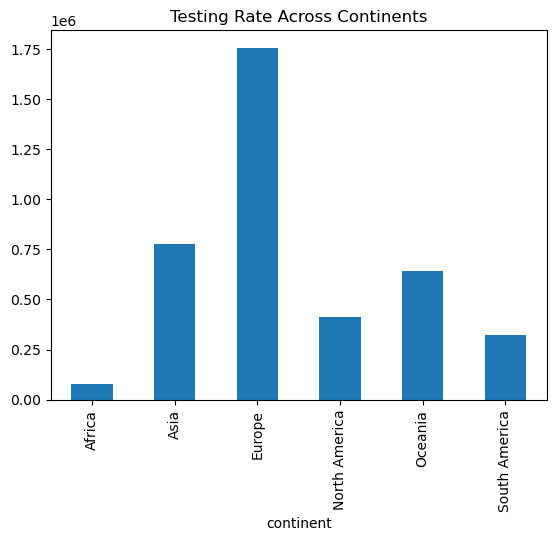

In [15]:
# Q13.	Analyze testing rates across continents and countries.

df['tests_per_million'] = (df['total_tests'] / df['population']) * 1e6
continent_testing = df.groupby('continent')['tests_per_million'].mean()
continent_testing.plot(kind='bar')
plt.title('Testing Rate Across Continents')
plt.show()


In [ ]:
# Q14.	Study the distribution of hospital beds per thousand people by continent.

